In [45]:
import json
import pandas as pd
import gzip
import sys
sys.path.append('../src')
from utils import *
import numpy as np

In [ ]:

meta = getDF('../../project/meta_Sports_and_Outdoors.json', save=False)
df = pd.read_csv('../../project/Sports_and_Outdoors_5_2016_2018.csv')

In [38]:
meta['price'] = meta['price'].str.replace('$', '')
meta['price'] = meta['price'].replace('nan', 0).replace('', 0)
meta['price'] = meta['price'].apply(pd.to_numeric, errors='coerce').fillna(0)

meta['also_buy'] = meta['also_buy'].fillna('[]').apply(lambda x: len(x))
meta['also_view'] = meta['also_view'].fillna('[]').apply(lambda x: len(x))

meta = meta.drop(['tech2', 'tech1', 'fit', 'date', 'details', 'imageURL', 'imageURLHighRes', 'rank', 'similar_item', 'description', 'feature'], axis=1)

C:\Users\aurav\AppData\Local\Temp\ipykernel_22320\3759937403.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  meta['price'] = meta['price'].str.replace('$', '')


In [39]:
meta.head()

,category,title,also_buy,brand,also_view,main_cat,price,asin
0,"[Sports & Outdoors, Sports & Fitness, Other Sp...",Adult Tutu Assorted Colors (Turquoise),0,BubuBibi,59,"<img src=""https://images-na.ssl-images-amazon....",11.80,0000032042
1,"[Sports & Outdoors, Sports & Fitness, Other Sp...",Bububibi Adult Ballet Tutu Cheetah Pink,0,BubuBibi,0,"<img src=""https://images-na.ssl-images-amazon....",11.97,0000032069
2,"[Sports & Outdoors, Sports & Fitness, Other Sp...",Girls Ballet Tutu Neon Orange,1,Unknown,33,Toys & Games,5.70,0000031860
3,"[Sports & Outdoors, Sports & Fitness, Other Sp...",Girls Ballet Tutu Zebra Hot Pink,0,Tutu,1,Sports & Outdoors,7.50,0000031852
4,"[Sports & Outdoors, Sports & Fitness, Other Sp...",Girls Ballet Tutu Neon Blue,70,Bububibi,50,Toys & Games,6.54,0000031895


In [40]:
df.head()

,overall,reviewTime,reviewerID,asin,reviewText,unixReviewTime
0,5.0,2016-12-27,ASAE9FBGAJQAH,0899332757,Arrived on time. Nice Atlas - Easy to read.,1482796800
1,3.0,2016-12-12,A1TAW91SQSU2AH,0899332757,More of a road map than a useful topographical...,1481500800
2,5.0,2016-08-13,A1SVGO4GMEOXQ0,0899332757,Comprehensive atlas. Very happy with how much ...,1471046400
3,5.0,2016-08-02,A36QT6N7N0GF3O,0899332757,Delorme has always made the best book maps in ...,1470096000
4,5.0,2016-07-14,AJGZDX7KC5TVQ,0899332757,worked great on the trip around ny,1468454400


# group definition

g1<average order price (5$ by 5$), category>

In [41]:
# count number of order for each reviewer
df = df.join(meta.set_index('asin'), on='asin')
df['nb_order'] = df.groupby('reviewerID')['reviewerID'].transform('count')
# make average price for each reviewer
df['avg_price'] = df.groupby('reviewerID')['price'].transform('mean')
df.head()

,overall,reviewTime,reviewerID,asin,reviewText,unixReviewTime,category,title,also_buy,brand,also_view,main_cat,price,nb_order,avg_price
0,5.0,2016-12-27,ASAE9FBGAJQAH,0899332757,Arrived on time. Nice Atlas - Easy to read.,1482796800,"[Sports & Outdoors, Outdoor Recreation, Campin...",Delorme New York State Atlas &amp; Gazetteer,78.0,Garmin,38.0,Office Products,19.95,11,21.160909
1,3.0,2016-12-12,A1TAW91SQSU2AH,0899332757,More of a road map than a useful topographical...,1481500800,"[Sports & Outdoors, Outdoor Recreation, Campin...",Delorme New York State Atlas &amp; Gazetteer,78.0,Garmin,38.0,Office Products,19.95,4,9.585000
2,5.0,2016-08-13,A1SVGO4GMEOXQ0,0899332757,Comprehensive atlas. Very happy with how much ...,1471046400,"[Sports & Outdoors, Outdoor Recreation, Campin...",Delorme New York State Atlas &amp; Gazetteer,78.0,Garmin,38.0,Office Products,19.95,4,9.065000
3,5.0,2016-08-02,A36QT6N7N0GF3O,0899332757,Delorme has always made the best book maps in ...,1470096000,"[Sports & Outdoors, Outdoor Recreation, Campin...",Delorme New York State Atlas &amp; Gazetteer,78.0,Garmin,38.0,Office Products,19.95,7,10.232857
4,5.0,2016-07-14,AJGZDX7KC5TVQ,0899332757,worked great on the trip around ny,1468454400,"[Sports & Outdoors, Outdoor Recreation, Campin...",Delorme New York State Atlas &amp; Gazetteer,78.0,Garmin,38.0,Office Products,19.95,5,39.394000


In [43]:
# make a dataframe with the revviwerId, average price of order, main_cat, number of order
df1 = df[['reviewerID', 'avg_price', 'main_cat', 'nb_order']].drop_duplicates()
df1.head()

,reviewerID,avg_price,main_cat,nb_order
0,ASAE9FBGAJQAH,21.160909,Office Products,11
1,A1TAW91SQSU2AH,9.585000,Office Products,4
2,A1SVGO4GMEOXQ0,9.065000,Office Products,4
3,A36QT6N7N0GF3O,10.232857,Office Products,7
4,AJGZDX7KC5TVQ,39.394000,Office Products,5


<Axes: >

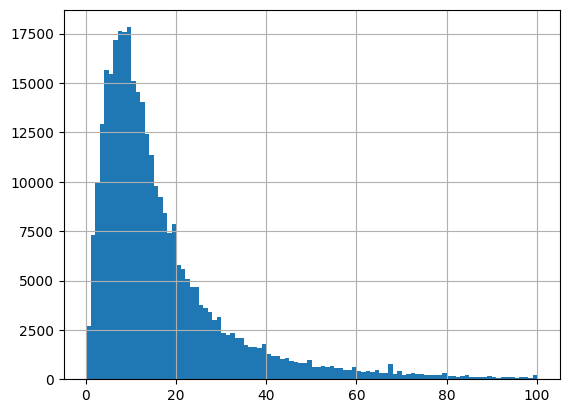

In [55]:
# keep between 0 and 100
df1 = df1[df1['avg_price'] < 100]
df1 = df1[df1['avg_price'] > 0]
df1['avg_price'].hist(bins=100)

<Axes: >

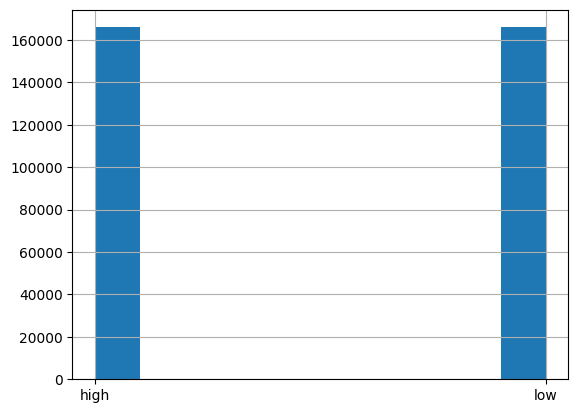

In [65]:
#make 2 category of reviewer, low and high spender based on the average price of order the cut is 10
df1['spender'] = np.where(df1['avg_price'] > df1['avg_price'].median(), 'high', 'low')
#make histogram who count number of reviewer for each category
df1['spender'].hist()

<Axes: >

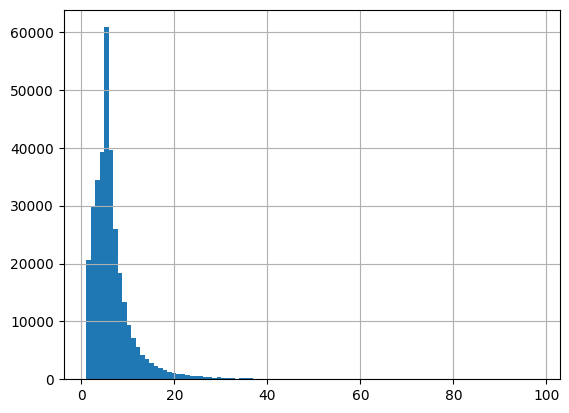

In [68]:
df1 = df1[df1['nb_order'] < 100]
df1['nb_order'].hist(bins=100)

<Axes: >

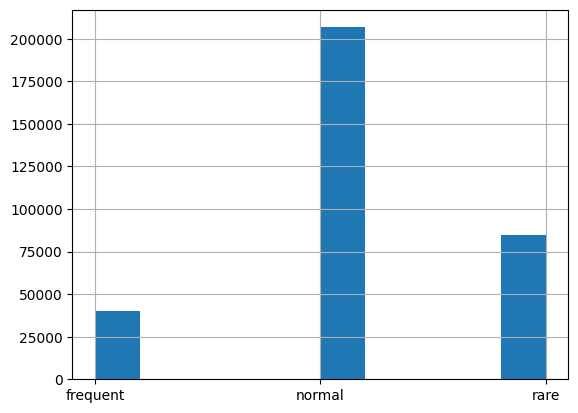

In [70]:
# make 3 category of reviewer, rare, normal and frequent based on the number of order the cut is 2, 10
df1['order'] = np.where(df1['nb_order'] > 10, 'frequent', np.where(df1['nb_order'] > 3, 'normal', 'rare'))
#make histogram who count number of reviewer for each category
df1['order'].hist()

In [ ]:
def alpha_momri(k, alpha, R):
    """
    Implements the alpha-approximation MOMRI algorithm.

    Args:
        k: The number of user groups.
        alpha: The alpha parameter.
        R: The resource matrix.

    Returns:
        A list of Pareto-optimal plans.
    """
     
    P_alpha = []

    # Construct the plan for each user group.
    for g in range(k):
        pg = construct_plan(g, R)
        if not is_alpha_dominated(pg, P_alpha):
            P_alpha.append(pg)

    # Construct the plans for all group sets of size n.
    for n in range(2, k + 1):
        for G in itertools.combinations(range(k), n):
            pG = construct_plan(G, R)
            if not is_alpha_dominated(pG, P_alpha):
                P_alpha.append(pG)

    return P_alpha
    
def construct_plan(G, R):
    """
    Constructs a plan for a given user group.

    Args:
        G: The user group.
        R: The resource matrix.

    Returns:
        The plan for the user group.
    """

    plan = np.zeros(R.shape[1])
    for i in range(R.shape[1]):
        plan[i] = max(0, R[i] - )